# The code for Portfolio Optimization
____________________________________________________________________________________________________________________________________________________________

# Importing packages

In [1]:
!pip install pandas-datareader
!pip install yfinance 
!pip install yahoofinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.8 MB/s 
     |████████████████████████████████| 6.4 MB 57.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in index

In [2]:
import pandas_datareader.data as web
import yfinance as yf
import pandas as pd
import numpy as np
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(style="whitegrid")
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
from pandas_datareader import data
import pandas_datareader as pdr
from datetime import datetime

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Taking stocks from different sectors of the Market

In [3]:

def get_historical_Data(tickers):
    """This function returns a pd dataframe with all of the adjusted closing information"""
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2020, 11, 16)).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    return data

ticks = ['AVANTEL.BO','TATAPOWER.NS','ADANIPOWER.BO','INFY.BO','HCLTECH.NS','COALINDIA.NS']
df = get_historical_Data(ticks)

# Most Recent Data
df.tail()




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AVANTEL.BO,TATAPOWER.NS,ADANIPOWER.BO,INFY.BO,HCLTECH.NS,COALINDIA.NS
Date,,,,,,
2022-06-30,269.649994,202.199997,262.549988,1461.199951,973.250000,185.600006
2022-07-01,256.200012,207.000000,263.399994,1478.050049,975.349976,183.250000
2022-07-04,249.350006,211.449997,261.899994,1487.750000,984.599976,182.050003
2022-07-05,243.600006,212.800003,262.649994,1476.349976,982.150024,182.449997
2022-07-06,244.300003,214.000000,262.600006,1491.949951,986.599976,181.699997


In [ ]:
returns_portfolio=df.pct_change()[1:]
returns_portfolio.head()[1:]

,AVANTEL.BO,INFY.BO,AFFLE.NS,HAL.NS,CAPPL.BO,LXCHEM.NS,KEC.NS,MUTHOOTFIN.NS,SAREGAMA.NS,COLPAL.NS,ASIANPAINT.NS,HDFCBANK.NS
Date,,,,,,,,,,,,
2020-11-19,-0.008961,-0.012741,-0.007371,0.007810,0.015293,NaN,0.011150,-0.005991,0.011856,-0.003547,-0.015507,-0.024384
2020-11-20,-0.003532,0.006020,0.049997,-0.002648,-0.002107,NaN,0.012188,0.011713,-0.014228,0.011405,0.002244,0.021319
2020-11-23,0.003686,0.033725,0.050000,-0.000065,0.052143,NaN,0.003870,-0.023112,0.003722,0.021511,0.009093,-0.006448
2020-11-24,-0.000283,-0.000965,0.001408,0.024671,-0.015650,NaN,-0.003427,-0.015787,-0.000976,-0.007179,0.009903,0.031263


# The covariance matrix

## In this cell we will be calculating the covariance matrix as in the weight calculation we will be using the product of covariance and correlation


In [4]:
# In this cell we eill be claculating the covariance matrix as in the weight calculation we will be using the product of covariance and correlation
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,AVANTEL.BO,TATAPOWER.NS,ADANIPOWER.BO,INFY.BO,HCLTECH.NS,COALINDIA.NS
AVANTEL.BO,0.005951,0.000297,0.000352,0.000092,0.000041,0.000178
TATAPOWER.NS,0.000297,0.000829,0.000462,0.000133,0.000140,0.000328
ADANIPOWER.BO,0.000352,0.000462,0.001599,0.000088,0.000140,0.000229
INFY.BO,0.000092,0.000133,0.000088,0.000235,0.000171,0.000068
HCLTECH.NS,0.000041,0.000140,0.000140,0.000171,0.000282,0.000105
COALINDIA.NS,0.000178,0.000328,0.000229,0.000068,0.000105,0.000504


# Here we calculate the correlation

In [5]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,AVANTEL.BO,TATAPOWER.NS,ADANIPOWER.BO,INFY.BO,HCLTECH.NS,COALINDIA.NS
AVANTEL.BO,1.000000,0.133773,0.114152,0.077725,0.031941,0.102729
TATAPOWER.NS,0.133773,1.000000,0.400852,0.301595,0.289249,0.506871
ADANIPOWER.BO,0.114152,0.400852,1.000000,0.143196,0.208558,0.255507
INFY.BO,0.077725,0.301595,0.143196,1.000000,0.665602,0.198893
HCLTECH.NS,0.031941,0.289249,0.208558,0.665602,1.000000,0.280082
COALINDIA.NS,0.102729,0.506871,0.255507,0.198893,0.280082,1.000000


# Expected Returns

In [6]:
# Here we will be calculating the expected return 
exp_ret = df.resample('Y').last().pct_change().mean()
exp_ret

AVANTEL.BO       0.204638
TATAPOWER.NS     0.966688
ADANIPOWER.BO    1.319812
INFY.BO          0.166145
HCLTECH.NS       0.101050
COALINDIA.NS     0.246859
dtype: float64

# Volatility

In [7]:
# Here we caculate the volatility

vol_risk = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(399))
vol_risk

AVANTEL.BO       1.540904
TATAPOWER.NS     0.575197
ADANIPOWER.BO    0.798686
INFY.BO          0.306336
HCLTECH.NS       0.335191
COALINDIA.NS     0.448274
dtype: float64

In [8]:
assets = pd.concat([exp_ret,vol_risk], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
AVANTEL.BO,0.204638,1.540904
TATAPOWER.NS,0.966688,0.575197
ADANIPOWER.BO,1.319812,0.798686
INFY.BO,0.166145,0.306336
HCLTECH.NS,0.101050,0.335191
COALINDIA.NS,0.246859,0.448274


# Here the task of calculating the weights start by monte carlo

In [9]:
# We will keep on finding random 1000 weights such that we get the one which is the best
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 100000

In [10]:
#Monte carlo simulation
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, exp_ret) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    vol_risk = sd*np.sqrt(399) # Annual standard deviation = volatility
    p_vol.append(vol_risk)

In [11]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [12]:
#Now this the data of all the 1000 weight but we will be chossing the one witht the lowest risk or volatility
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AVANTEL.BO weight,TATAPOWER.NS weight,ADANIPOWER.BO weight,INFY.BO weight,HCLTECH.NS weight,COALINDIA.NS weight
0,0.571857,0.372429,0.090785,0.219059,0.192087,0.136419,0.164208,0.197442
1,0.510221,0.339020,0.054318,0.131591,0.207675,0.134658,0.281357,0.190400
2,0.466029,0.437916,0.199825,0.291324,0.043031,0.325199,0.013844,0.126777
3,0.508677,0.445365,0.192869,0.092050,0.218198,0.118751,0.142859,0.235273
4,0.511313,0.534339,0.276694,0.074693,0.236069,0.217054,0.091913,0.103577


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


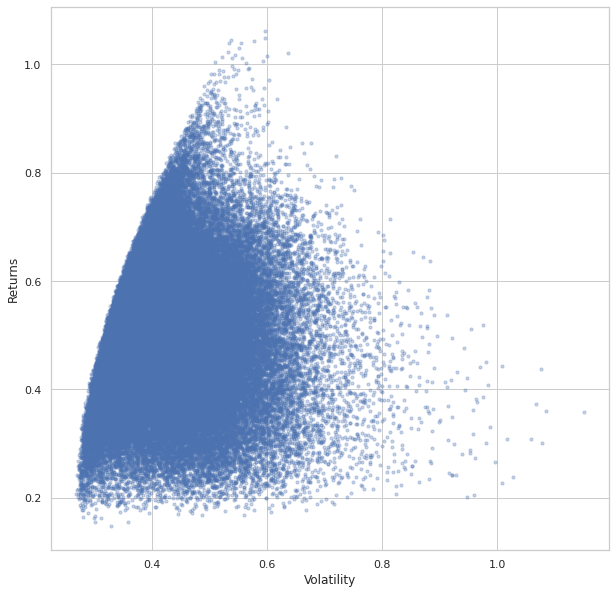

In [13]:

portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [14]:
# Here we figure out the min value
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns                 0.207441
Volatility              0.268137
AVANTEL.BO weight       0.017975
TATAPOWER.NS weight     0.022542
ADANIPOWER.BO weight    0.019368
INFY.BO weight          0.441880
HCLTECH.NS weight       0.274335
COALINDIA.NS weight     0.223900
Name: 95735, dtype: float64

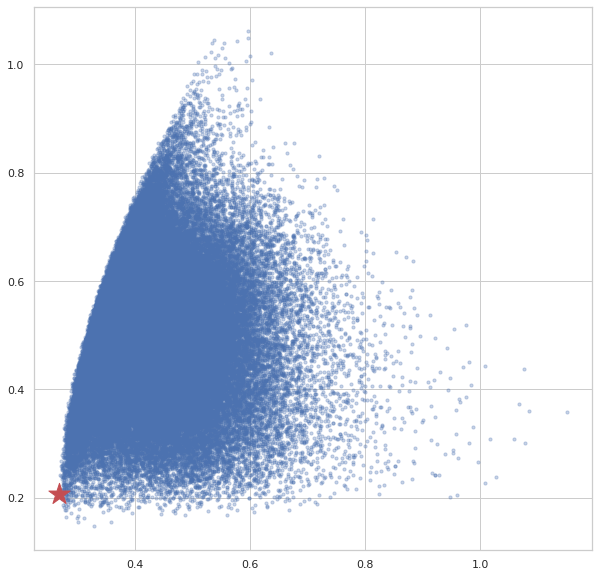

In [15]:
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

# Sharpe Ratio

## Sharpe ration is a mathematical tool where in we can increase the returns of a portfolio with an increase of risk by taking the non risky returns into consideration

In [16]:
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns                 1.004742
Volatility              0.508470
AVANTEL.BO weight       0.005235
TATAPOWER.NS weight     0.463780
ADANIPOWER.BO weight    0.403923
INFY.BO weight          0.109664
HCLTECH.NS weight       0.001897
COALINDIA.NS weight     0.015503
Name: 29542, dtype: float64

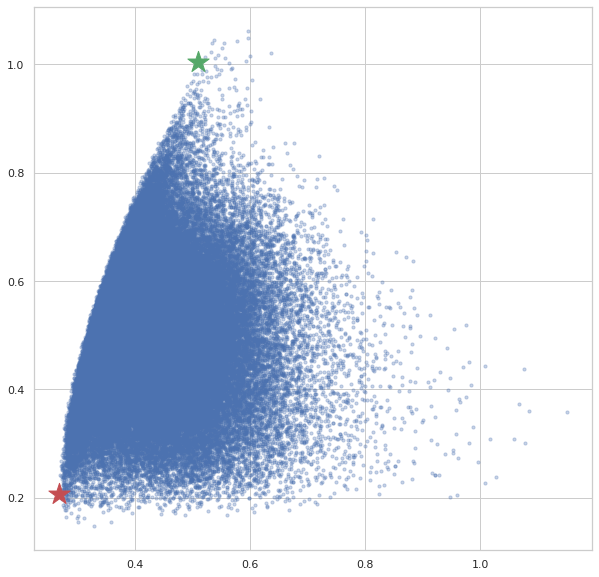

In [17]:
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

#1.) How did you choose the Stocks?

## In this I have choosen 6 stocks of which Tata Power and Adani Power are utilities stocks and it was mentioned in investopedia that the utilities stocks usually have beta <1
## Next SBI and Coal India are the stocks with beta = 1
## And finally the Infosys and HCL Technologies are the Technology based share and they usually have a Beta > 1

#2.) What is the impact of increasing the number of stocks in the portfolio?

## On increasing the number of stocks the risk or the volitility decreases but the weight of a particular stock also decreases

# 3.) Why are calculating the weights by optimization and not giving equal weightage to every stock?

## The reason is that all the stocks don't provide the same return with same risk so we need to divide our money in such a way that we can maximize profits with less risk


# 4.) Which optimization techniques are used by Mutual Funds currently?

## The Modern Portfolio Theory (MPT)

# 5.) Which parameters are you using to check the accuracy of your model?

## The Sharpe Factor and also the Jenson's Alpha